### Comparing chlorophull-a concentration extimates for Trocas expeditions in the Amazon mouth

- I used find and replace in LibreOffice to remove all the Portuguese accents from the Excel final, and then I saved the first tab as a `csv` so I could easily read into Python.

In [1]:
import os
os.chdir("/home/millieginty/Documents/git-repos/amazon/")

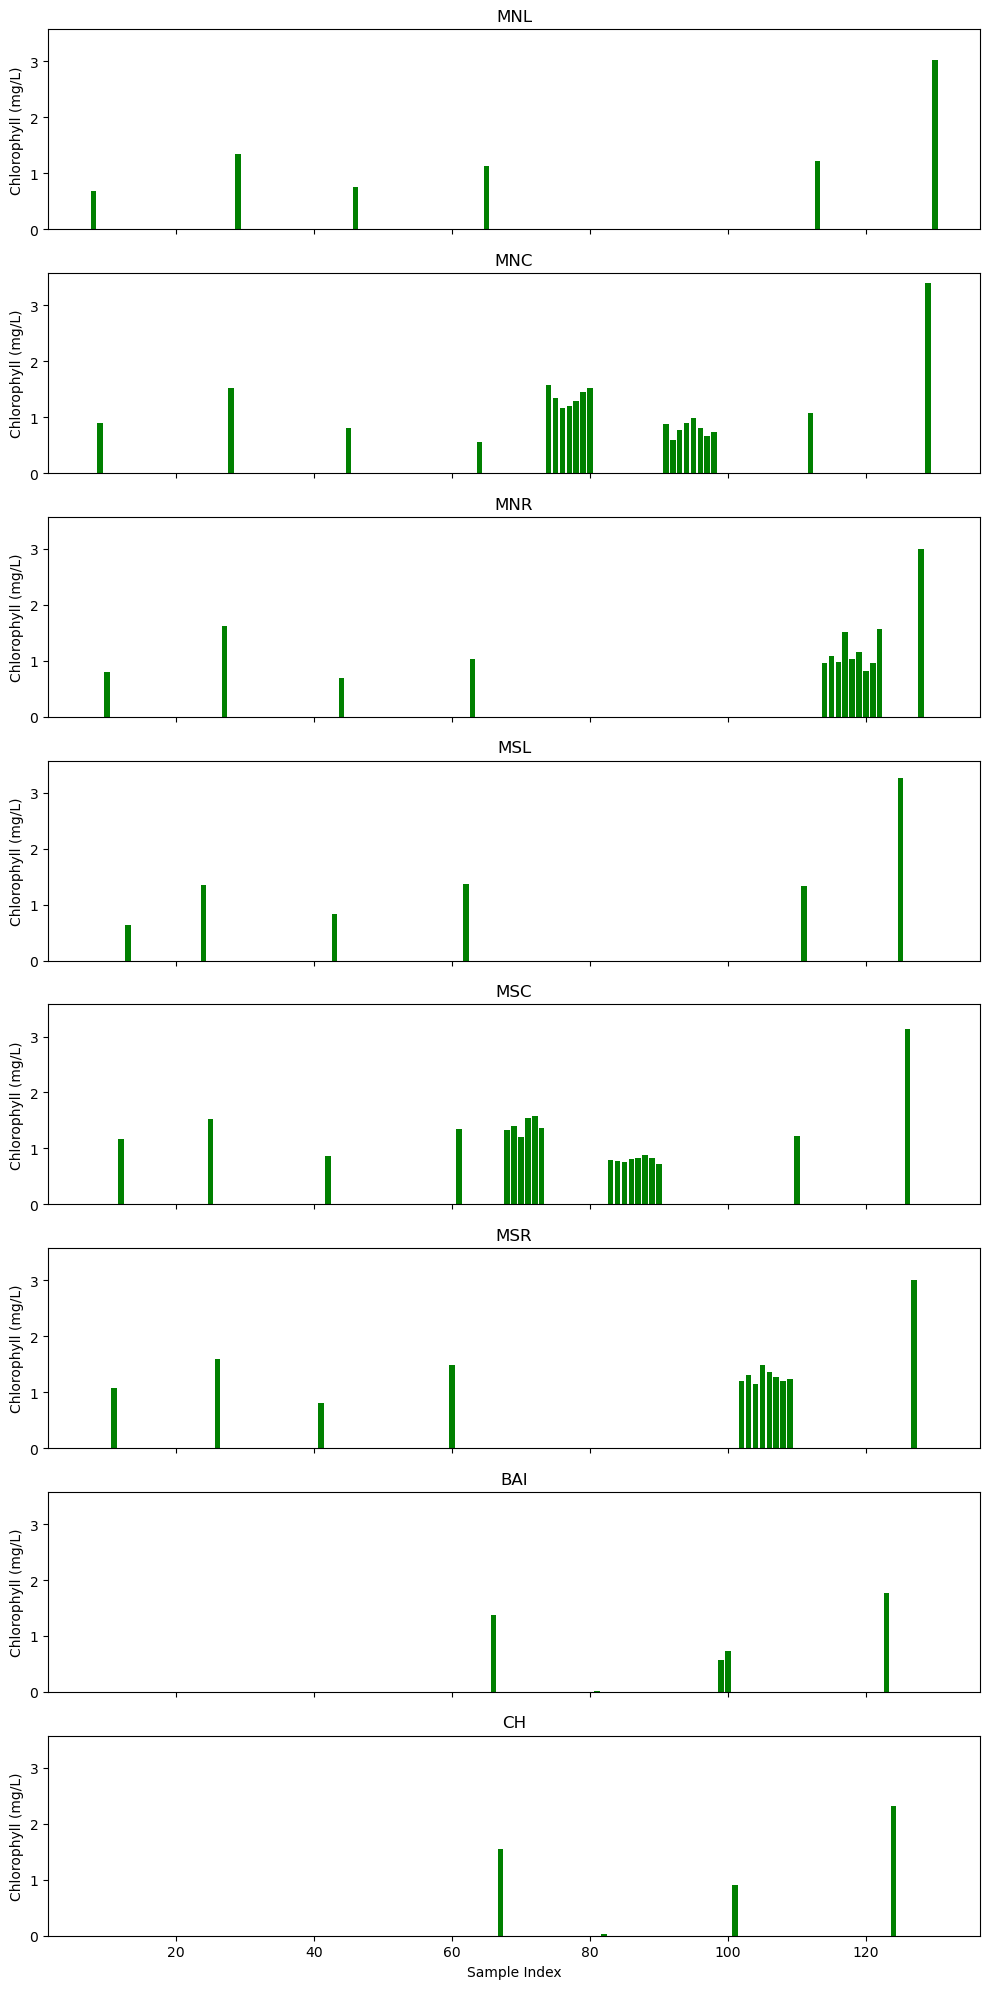

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load INPE fluorometer data sent by Aline in Dec 2023
# There's a copy of the Excel file in my manuscripts directory
fluor_data = pd.read_csv("data/chlorophyll/HPLCandFluorChlaT1toT8_super.csv")

# Define the rivers to plot
rivers_to_plot = ['MNL', 'MNC', 'MNR', 'MSL', 'MSC', 'MSR', 'BAI', 'CH']

# Filter data for each river and plot
fig, axs = plt.subplots(len(rivers_to_plot), figsize=(10, 20), sharex=True, sharey=True)

for i, river in enumerate(rivers_to_plot):
    river_data = fluor_data[fluor_data['RIVER'].str.startswith(river)]
    axs[i].bar(river_data.index, river_data['CHLA-FLUOR'], color='green')  # Assuming 'CHLA-FLUOR' is the column with chlorophyll data
    axs[i].set_title(river)
    axs[i].set_ylabel('Chlorophyll (mg/L)')

plt.xlabel('Sample Index')
plt.tight_layout()
plt.show()

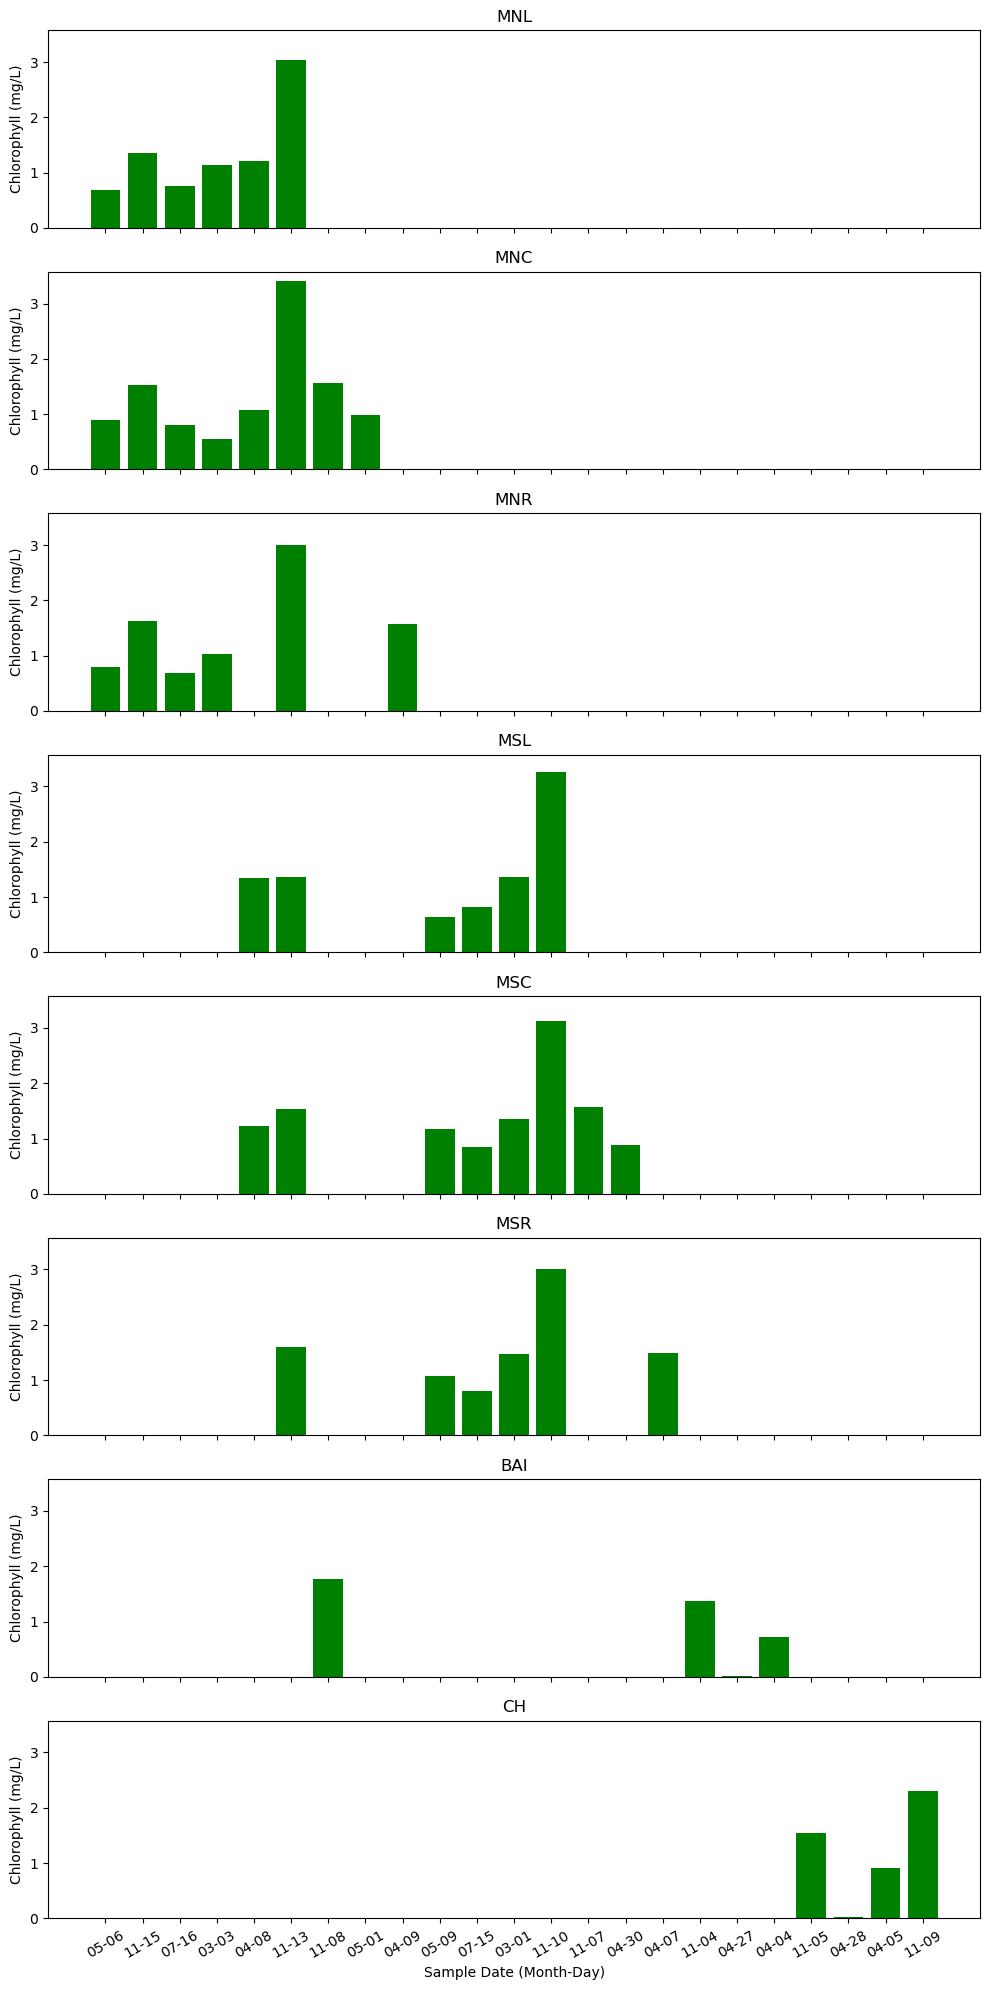

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load INPE fluorometer data sent by Aline in Dec 2023
# There's a copy of the Excel file in my manuscripts directory
fluor_data = pd.read_csv("data/chlorophyll/HPLCandFluorChlaT1toT8_super.csv")

# Convert 'DATE' column to datetime
fluor_data['DATE'] = pd.to_datetime(fluor_data['DATE'])

# Sort data by date
fluor_data.sort_values(by='DATE', inplace=True)

# Define the rivers to plot
rivers_to_plot = ['MNL', 'MNC', 'MNR', 'MSL', 'MSC', 'MSR', 'BAI', 'CH']

# Filter data for each river and plot
fig, axs = plt.subplots(len(rivers_to_plot), figsize=(10, 20), sharex=True, sharey=True)

for i, river in enumerate(rivers_to_plot):
    river_data = fluor_data[fluor_data['RIVER'].str.startswith(river)]
    # Create index using only month and day
    river_data.index = river_data['DATE'].dt.strftime('%m-%d')
    axs[i].bar(river_data.index, river_data['CHLA-FLUOR'], color='green')  # Change bar color to green
    axs[i].set_title(river)
    axs[i].set_ylabel('Chlorophyll (mg/L)')

plt.xlabel('Sample Date (Month-Day)')
plt.xticks(rotation=30)  # Rotate x-axis labels by 30 degrees
plt.tight_layout()
plt.show()

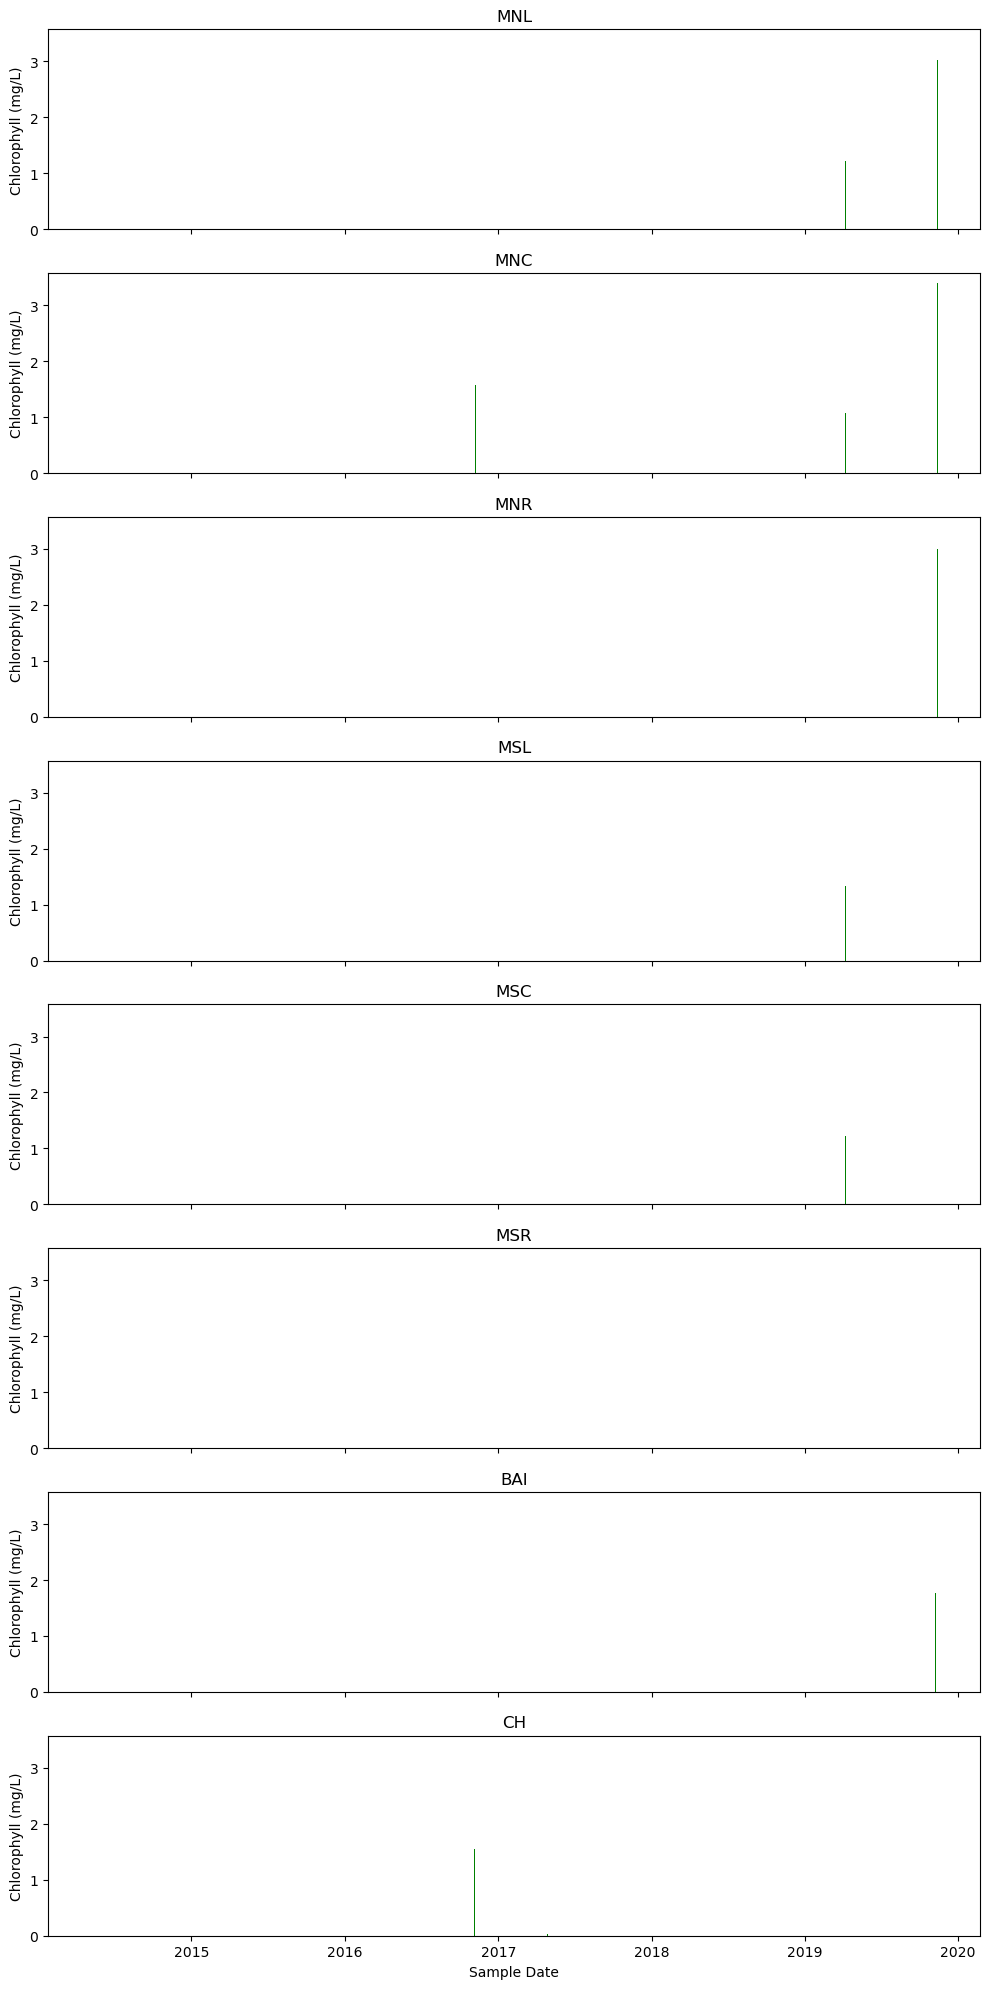

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load INPE fluorometer data sent by Aline in Dec 2023
# There's a copy of the Excel file in my manuscripts directory
fluor_data = pd.read_csv("data/chlorophyll/HPLCandFluorChlaT1toT8_super.csv")

# Convert 'DATE' column to datetime and set it as the index
fluor_data['DATE'] = pd.to_datetime(fluor_data['DATE'])
fluor_data.set_index('DATE', inplace=True)

# Define the rivers to plot
rivers_to_plot = ['MNL', 'MNC', 'MNR', 'MSL', 'MSC', 'MSR', 'BAI', 'CH']

# Filter data for each river and plot
fig, axs = plt.subplots(len(rivers_to_plot), figsize=(10, 20), sharex=True, sharey=True)

for i, river in enumerate(rivers_to_plot):
    river_data = fluor_data[fluor_data['RIVER'].str.startswith(river)]
    axs[i].bar(river_data.index, river_data['CHLA-FLUOR'], color='green')  # Assuming 'CHLA-FLUOR' is the column with chlorophyll data
    axs[i].set_title(river)
    axs[i].set_ylabel('Chlorophyll (mg/L)')

plt.xlabel('Sample Date')
plt.tight_layout()
plt.show()

In [21]:
fluor_data.head(-20)

,N,TROCAS,SEASON,TYPE,RIVER,RIVER2,STATION,Name TROCAS,LATITUDE,LONGITUDE,CHLA-HPLC,CHLA-FLUOR,TEMP,PH,TSM (mg/L)
DATE,,,,,,,,,,,,,,,
2014-05-01,1,1,H,A,OR,O,1T01,Obidos Margem Direita Superficie,-1.958000,-55.481100,0.448,0.885662,28.9,6.600000,NaN
2014-05-01,2,1,H,A,OL,O,1T02,Obidos Margem Esquerda Superficie,-1.940200,-55.486500,0.769,1.410758,29.1,6.620000,NaN
2014-05-01,3,1,H,A,OC,O,1T03,Obidos Meio Superficie,-1.946100,-55.494500,0.415,0.856490,28.8,6.600000,NaN
2014-05-02,4,1,H,O,T,T,1T04,Tapajos meio superficie,-2.459000,-55.006000,22.966,31.298833,29.7,6.460000,5.496667
2014-05-04,5,1,H,A,AC,A,1T05,Almerim Meio Superficie,-1.570200,-52.631800,0.651,1.095700,28.9,6.680000,54.540333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-07,157,7,H,A,MSR,MS,T7MSC5,Macapa Sul Margem Direita Superficie - M5,-0.191250,-50.617167,NaN,1.367328,29.1,6.807000,112.645503
2019-04-07,158,7,H,A,MSR,MS,T7MSC6,Macapa Sul Margem Direita Superficie - M6,-0.191250,-50.617167,NaN,1.271124,28.9,6.774333,NaN
2019-04-07,159,7,H,A,MSR,MS,T7MSC7,Macapa Sul Margem Direita Superficie - M7,-0.191250,-50.617167,NaN,1.197411,28.9,6.831000,NaN
